# **K-Means Clustering**

---

AssignmentČ
This assignment is important for you to demonstrate your ability to use K-Means Clustering to cluster data for analysis.

In this assignment, you will complete the assignment notebook provided in Dropbox.

Make sure to make a copy of the notebook in your google drive before getting started. All of the libraries you need have been imported for you.


* Work through at least 2 of preloaded datasets to:
   * Standardize the data
  * Create an Elbow Plot to determine the number of clusters
  * Apply the K-Means Clustering model
  * Plot the clusters including the centroid for each of the clusters as defined by K-Means
       * Plot all of the clusters together with different colors to make it easier to interpret
  * Determine the accuracy score if true labels are known


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [89]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [90]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data
scaled_df = scaler.fit_transform(X)

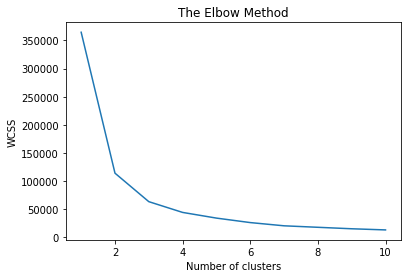

In [91]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##  **K-Means clustering model**

In [92]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X)

In [93]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0]


In [94]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 37.30952381  81.68253968]
 [ 64.7972973  149.64864865]]


In [96]:
# assign the y_kmeans to a new column in the dataset
df_dh['Cluster']= y_kmeans
df_dh

,height,weight,target,type,Cluster
0,27.0,71.0,0.0,dog,0
1,27.0,92.0,0.0,dog,0
2,32.0,47.0,0.0,dog,0
3,30.0,90.0,0.0,dog,0
4,28.0,91.0,0.0,dog,0
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,1
196,82.0,179.0,1.0,horse,1
197,46.0,132.0,1.0,horse,1
198,56.0,89.0,1.0,horse,0


In [97]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'] = df_dh['type'].map({'dog': 1, 'horse': 0})

In [98]:
df_dh

,height,weight,target,type,Cluster
0,27.0,71.0,0.0,1,0
1,27.0,92.0,0.0,1,0
2,32.0,47.0,0.0,1,0
3,30.0,90.0,0.0,1,0
4,28.0,91.0,0.0,1,0
...,...,...,...,...,...
195,55.0,140.0,1.0,0,1
196,82.0,179.0,1.0,0,1
197,46.0,132.0,1.0,0,1
198,56.0,89.0,1.0,0,0


In [99]:
df_dh_new = pd.DataFrame(df_dh)

In [100]:
df_dh_new['predictions'] = np.where((df_dh_new['target'] == 0 ) & (df_dh_new['Cluster'] == 0), "True", "False")
df_dh_new.head()

,height,weight,target,type,Cluster,predictions
0,27.0,71.0,0.0,1,0,True
1,27.0,92.0,0.0,1,0,True
2,32.0,47.0,0.0,1,0,True
3,30.0,90.0,0.0,1,0,True
4,28.0,91.0,0.0,1,0,True


In [101]:
# Calculate the number of correct predictions
df_dh_new["predictions"].value_counts(normalize=True)

True     0.5
False    0.5
Name: predictions, dtype: float64

In [102]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_dh_new["target"], y_kmeans)


0.87

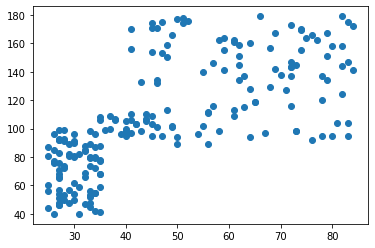

In [106]:
plt.scatter(df_dh_new['height'],df_dh_new['weight'])

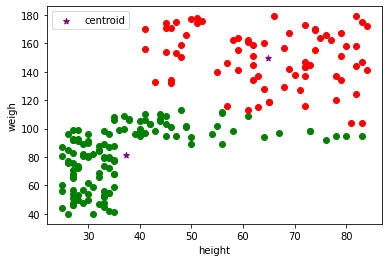

In [110]:
df1 = df_dh_new[df_dh_new.Cluster==0]
df2 = df_dh_new[df_dh_new.Cluster==1]
#df3 = df_dh_new[df_dh_new.cluster==2]
plt.scatter(df1['height'],df1['weight'],color='green')
plt.scatter(df2['height'],df2['weight'],color='red')
#plt.scatter(df3['']Age,df3[''],color='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('height')
plt.ylabel('weigh')
plt.legend()



# Seattle Weather KMeans Challenge

In [199]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [200]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data
scaled_df = scaler.fit_transform(X_sea)

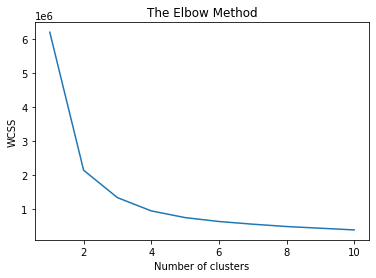

In [201]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_sea)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##  **K-Means clustering model**

In [202]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X_sea)

In [203]:
print(y_kmeans)

[0 0 0 ... 0 0 0]


In [204]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[49.93536094 38.1826287 ]
 [71.02233101 52.07755733]]


In [207]:
# assign the y_kmeans to a new column
df_sea['cluster']= y_kmeans
df_sea.tail(50)

,ds,prcp,tmax,tmin,rain,cluster
25501,2017-10-26,0.00,58,49,False,1
25502,2017-10-27,0.00,66,46,False,1
25503,2017-10-28,0.00,68,44,False,1
25504,2017-10-29,0.00,56,46,False,0
25505,2017-10-30,0.00,63,45,False,1
25506,2017-10-31,0.00,58,38,False,0
25507,2017-11-01,0.01,55,47,True,0
25508,2017-11-02,0.19,50,42,True,0
25509,2017-11-03,0.30,43,33,True,0
25510,2017-11-04,0.42,41,35,True,0


In [208]:
df_sea_new = pd.DataFrame(df_sea)

In [215]:
df_sea_new['predictions'] = np.where((df_sea_new['rain'] == True ) & (df_sea_new['cluster'] == 1), "True", "False")
df_sea_new.tail(40)

,ds,prcp,tmax,tmin,rain,cluster,predictions
25511,2017-11-05,0.61,40,33,True,0,False
25512,2017-11-06,0.00,47,36,False,0,False
25513,2017-11-07,0.00,48,38,False,0,False
25514,2017-11-08,0.15,54,45,True,0,False
25515,2017-11-09,0.42,50,43,True,0,False
25516,2017-11-10,0.01,51,41,True,0,False
25517,2017-11-11,0.05,52,43,True,0,False
25518,2017-11-12,0.52,57,47,True,0,False
25519,2017-11-13,0.81,55,45,True,0,False
25520,2017-11-14,0.05,54,44,True,0,False


In [218]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea_new['aft_conv_pred'] = np.where((df_sea_new['predictions'] == "True" ), 1, 0)
df_sea_new.tail(40)

,ds,prcp,tmax,tmin,rain,cluster,predictions,aft_conv_pred
25511,2017-11-05,0.61,40,33,True,0,False,0
25512,2017-11-06,0.00,47,36,False,0,False,0
25513,2017-11-07,0.00,48,38,False,0,False,0
25514,2017-11-08,0.15,54,45,True,0,False,0
25515,2017-11-09,0.42,50,43,True,0,False,0
25516,2017-11-10,0.01,51,41,True,0,False,0
25517,2017-11-11,0.05,52,43,True,0,False,0
25518,2017-11-12,0.52,57,47,True,0,False,0
25519,2017-11-13,0.81,55,45,True,0,False,0
25520,2017-11-14,0.05,54,44,True,0,False,0


In [224]:
df_sea_new["rain"].value_counts(normalize=True)

0    0.573402
1    0.426598
Name: rain, dtype: float64

In [225]:
# Calculate the number of correct predictions
df_sea_new["aft_conv_pred"].value_counts(normalize=True)

0    0.885601
1    0.114399
Name: aft_conv_pred, dtype: float64

In [226]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea_new['rain'] = np.where((df_sea_new['rain'] == True ), 1, 0)
df_sea_new.tail(40)

,ds,prcp,tmax,tmin,rain,cluster,predictions,aft_conv_pred
25511,2017-11-05,0.61,40,33,1,0,False,0
25512,2017-11-06,0.00,47,36,0,0,False,0
25513,2017-11-07,0.00,48,38,0,0,False,0
25514,2017-11-08,0.15,54,45,1,0,False,0
25515,2017-11-09,0.42,50,43,1,0,False,0
25516,2017-11-10,0.01,51,41,1,0,False,0
25517,2017-11-11,0.05,52,43,1,0,False,0
25518,2017-11-12,0.52,57,47,1,0,False,0
25519,2017-11-13,0.81,55,45,1,0,False,0
25520,2017-11-14,0.05,54,44,1,0,False,0


In [227]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_sea_new["rain"], y_kmeans)


0.3465226409925248

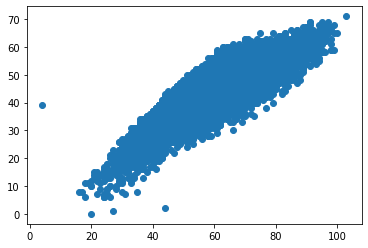

In [228]:
plt.scatter(df_sea_new['tmax'],df_sea_new['tmin'])

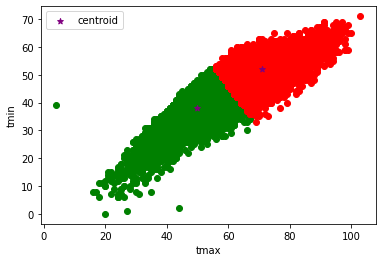

In [230]:
df1 = df_sea_new[df_sea_new.cluster==0]
df2 = df_sea_new[df_sea_new.cluster==1]

plt.scatter(df1['tmax'],df1['tmin'],color='green')
plt.scatter(df2['tmax'],df2['tmin'],color='red')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
